# Deep Q-Network (DQN)

In [4]:
import numpy as np
from torchinfo import summary

import ale_py
import gymnasium as gym

import sys
sys.path.append("./dqn") 
import evaluation
from atari_env import make_env
from q_network import CNNQNetwork
from dqn_cnn import run_dqn

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## preprocessing

In [4]:
env_id = "ALE/Breakout-v5"
env = make_env(env_id, render_mode="rgb_array")
env.observation_space

Box(0.0, 1.0, (4, 84, 84), float32)

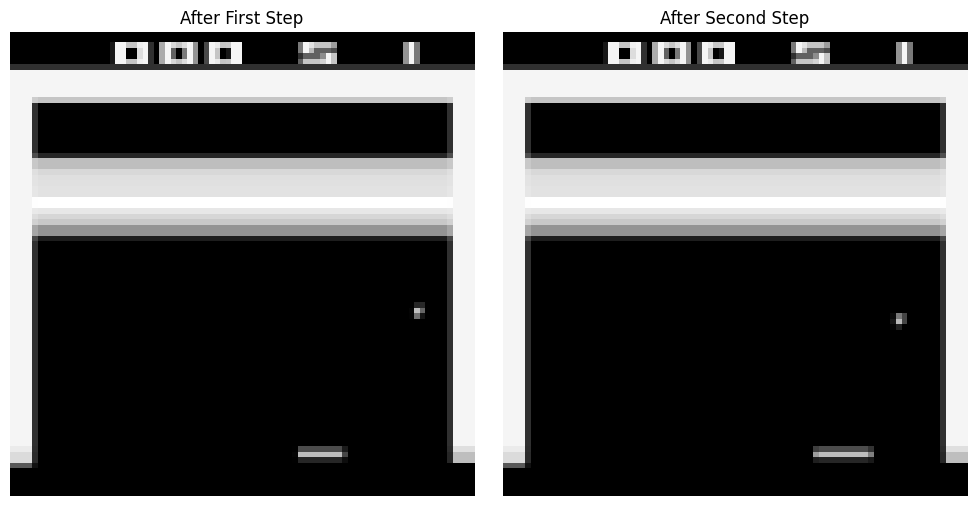


Verifying frame shifts:
Frame 0 of second step should equal Frame 1 of first step: True
Frame 1 of second step should equal Frame 2 of first step: True
Frame 2 of second step should equal Frame 3 of first step: True
New frame in second step should be different from all previous: True


In [6]:
import matplotlib.pyplot as plt

obs, _ = env.reset()

# Take first step
obs1, _, _, _, _ = env.step(env.action_space.sample())

# Take second step
obs2, _, _, _, _ = env.step(env.action_space.sample())

# Create a side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display first frame (obs1[-1])
axes[0].imshow(obs1[-1], cmap='gray')
axes[0].set_title("After First Step")
axes[0].axis('off')  # Hide axes for cleaner look

# Display second frame (obs2[-1])
axes[1].imshow(obs2[-1], cmap='gray')
axes[1].set_title("After Second Step")
axes[1].axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# Verify frames have shifted
print("\nVerifying frame shifts:")
print(f"Frame 0 of second step should equal Frame 1 of first step: {np.allclose(obs2[0], obs1[1])}")
print(f"Frame 1 of second step should equal Frame 2 of first step: {np.allclose(obs2[1], obs1[2])}")
print(f"Frame 2 of second step should equal Frame 3 of first step: {np.allclose(obs2[2], obs1[3])}")
print(f"New frame in second step should be different from all previous: {not np.any(np.allclose(obs2[3], obs1, atol=0.1))}")

env.close()

## Q-Network with CNN

In [17]:
env_id = "ALE/Pong-v5"
env = make_env(env_id, render_mode="rgb_array")

obs, _ = env.reset()
q_net = CNNQNetwork(env.observation_space, env.action_space)

# Get the correct input shape from the environment
input_shape = env.observation_space.shape

# Print model summary with correct input shape
print(f"\nModel Summary for input shape: {(1,) + input_shape}")
model_summary = summary(
    q_net,
    input_size=(1,) + input_shape,  # Add batch dimension
    col_names=["input_size", "output_size", "num_params", "kernel_size", "mult_adds"],
    verbose=0
)
print(model_summary)


Model Summary for input shape: (1, 4, 84, 84)
Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
CNNQNetwork                              [1, 4, 84, 84]            [1, 6]                    --                        --                        --
├─Sequential: 1-1                        [1, 4, 84, 84]            [1, 6]                    --                        --                        --
│    └─Conv2d: 2-1                       [1, 4, 84, 84]            [1, 32, 20, 20]           8,224                     [8, 8]                    3,289,600
│    └─ReLU: 2-2                         [1, 32, 20, 20]           [1, 32, 20, 20]           --                        --                        --
│    └─Conv2d: 2-3                       [1, 32, 20, 20]           [1, 64, 9, 9]             32,832                    [4, 4]                    2,659,392
│    └─ReLU: 2-4                         [1,

## Train DQN agent with target network

In [2]:
env_id = "ALE/Pong-v5"
# when in cpu, around 35mins
q_net = run_dqn(
    env_id= env_id,
    n_timesteps=1_000_000,     # 
    learning_starts=5_000,     # later learning starts
    exploration_fraction=0.5, # slower decay over 50% of timesteps
    replay_buffer_size=100_000,
    learning_rate=5e-4,
    batch_size=128,
    update_interval = 4,
    target_network_update_interval=1000,
    evaluation_interval=100_000,
    gamma=0.99,
)

Training on device: cuda


A.L.E: Arcade Learning Environment (version 0.10.2+c9d4b19)
[Powered by Stella]


=== Training started ===
Target network updated at step 1000
Target network updated at step 2000
Target network updated at step 3000
Target network updated at step 4000
Target network updated at step 5000
Target network updated at step 6000
Target network updated at step 7000
Target network updated at step 8000
Target network updated at step 9000
Step 10000/1000000
Target network updated at step 10000
Target network updated at step 11000
Target network updated at step 12000
Target network updated at step 13000
Target network updated at step 14000
Target network updated at step 15000
Target network updated at step 16000
Target network updated at step 17000
Target network updated at step 18000
Target network updated at step 19000
Step 20000/1000000
Target network updated at step 20000
Target network updated at step 21000
Target network updated at step 22000
Target network updated at step 23000
Target network updated at step 24000
Target network updated at step 25000
Target network update

In [7]:
env_id = "ALE/Pong-v5"
# when in cpu, around 35mins
q_net = run_dqn(
    env_id= env_id,
    n_timesteps=2_500_000,     # 
    learning_starts=0,     # later learning starts
    exploration_fraction=0.1, # slower decay over 50% of timesteps
    replay_buffer_size=100_000,
    learning_rate=5e-4,
    batch_size=128,
    update_interval = 4,
    target_network_update_interval=1000,
    evaluation_interval=100_000,
    gamma=0.99,
    checkpoint_path="./logs/q_net_checkpoint_ALE_Pong-v5_retarin.pth",
    new_learning_rate = 1e-4,
)

Training on device: cuda
Resuming from checkpoint: ./logs/q_net_checkpoint_ALE_Pong-v5_retarin.pth
=== Training started ===
Step 10000/2500000
Step 20000/2500000
Step 30000/2500000
Step 40000/2500000
Step 50000/2500000
Step 60000/2500000
Step 70000/2500000
Step 80000/2500000
Step 90000/2500000
Step 100000/2500000

=== Evaluation at step 100000 ===
Exploration rate: 0.60
Mean episode reward: -9.70 +/- 4.29
Step 110000/2500000
Step 120000/2500000
Step 130000/2500000
Step 140000/2500000
Step 150000/2500000
Step 160000/2500000
Step 170000/2500000
Step 180000/2500000
Step 190000/2500000
Step 200000/2500000

=== Evaluation at step 200000 ===
Exploration rate: 0.21
Mean episode reward: -9.30 +/- 3.26
Step 210000/2500000
Step 220000/2500000
Step 230000/2500000
Step 240000/2500000
Step 250000/2500000
Step 260000/2500000
Step 270000/2500000
Step 280000/2500000
Step 290000/2500000
Step 300000/2500000

=== Evaluation at step 300000 ===
Exploration rate: 0.01
Mean episode reward: -0.70 +/- 6.86
Ste

### Visualize the trained agent

In [10]:
import torch

eval_env = make_env("ALE/Pong-v5", render_mode="rgb_array")
n_eval_episodes = 3
eval_exploration_rate = 0.0
video_name = f"DQN_Pong"

# Optional: load checkpoint
q_net = CNNQNetwork(eval_env.observation_space, eval_env.action_space)
q_net.load_state_dict(torch.load("./logs/q_net_checkpoint_ALE_Pong-v5_2500000.pth"))

evaluation.evaluate_policy(
    eval_env,
    q_net,
    n_eval_episodes,
    eval_exploration_rate=eval_exploration_rate,
    video_name=video_name,
)


Mean episode reward: 16.67 +/- 0.47


(16.666666666666668, 0.4714045207910317)

## Training DQN agent on flappy bird:

You can go in the [GitHub repo](https://github.com/araffin/flappy-bird-gymnasium/tree/patch-1) to learn more about this environment.

<div>
    <img src="https://raw.githubusercontent.com/markub3327/flappy-bird-gymnasium/main/imgs/dqn.gif" width="300"/>
</div>


In [ ]:
!pip install "flappy-bird-gymnasium @ git+https://github.com/araffin/flappy-bird-gymnasium@patch-1"

In [ ]:
import flappy_bird_gymnasium  # noqa: F401

In [ ]:
env_id = "FlappyBird-v0"

q_net = run_dqn(
    env_id=env_id,
    replay_buffer_size=100_000,
    # Note: you can remove the target network
    # by setting target_network_update_interval=1
    target_network_update_interval=250,
    learning_starts=10_000,
    exploration_initial_eps=1.0,
    exploration_final_eps=0.03,
    exploration_fraction=0.1,
    n_timesteps=500_000,
    update_interval=4,
    learning_rate=1e-3,
    batch_size=128,
    gamma=0.98,
    n_eval_episodes=5,
    evaluation_interval=50000,
    n_hidden_units=256,
    # No exploration during evaluation
    # (deteministic policy)
    eval_exploration_rate=0.0,
    seed=2023,
    eval_render_mode=None,
)

### Record a video of the trained agent

In [ ]:
eval_env = gym.make(env_id, render_mode="rgb_array")
n_eval_episodes = 3
eval_exploration_rate = 0.00
video_name = f"DQN_{env_id}"


# Optional: load checkpoint
q_net = QNetwork(eval_env.observation_space, eval_env.action_space, n_hidden_units=256)
# Convert weights from float32 to float64 to match flappy bird obs
q_net.double()
q_net.load_state_dict(th.load("../logs/q_net_checkpoint_FlappyBird-v0_200000.pth"))

evaluation.evaluate_policy(
    eval_env,
    q_net,
    n_eval_episodes,
    eval_exploration_rate=eval_exploration_rate,
    video_name=video_name,
)

show_videos(video_folder, prefix=video_name)

### Going further

- analyse the learned q-values
- explore different value for the target update, use soft update instead of hard-copy
- experiment with Huber loss (smooth l1 loss) instead of l2 loss (mean squared error)
- play with different environments
- implement DQN extensions (double Q-learning, prioritized experience replay, Dueling DQN)